In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Nagoya_Station_data = pd.read_csv("./datas/Nagoya_Station_data.csv")
Nagoya_Station_data

,year,station_no,station_name,josha_num,ward_office,meijo,meiko,kamiida,higashiyama,tsurumai,sakuradori,aonami,shinkansen,tokaido,chuo,kansai,meitetsu,kintetsu,lines
0,1991,0,大曽根,4785428.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,1992,0,大曽根,4660204.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,1993,0,大曽根,4592223.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,1994,0,大曽根,4669642.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,1995,0,大曽根,4629653.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
5,1996,0,大曽根,4498914.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
6,1997,0,大曽根,4663364.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
7,1998,0,大曽根,4619636.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8,1999,0,大曽根,4375248.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,2000,0,大曽根,3744964.0,0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [2]:
#jrなどの利用者数を合算する為にgroupbyする
datas = Nagoya_Station_data.groupby(['station_name','year'])[['josha_num','lines']].sum()

print(datas)

                   josha_num  lines
station_name year                  
いりなか         1991  3632472.0      1
             1992  3549946.0      1
             1993  3572420.0      1
             1994  3484716.0      1
             1995  3517137.0      1
             1996  3564984.0      1
             1997  3667531.0      1
             1998  3822759.0      1
             1999  3774603.0      1
             2000  3872345.0      1
             2001  5957099.0      1
             2002  4311543.0      1
             2003  3949068.0      1
             2004  2831220.0      1
             2005  2664289.0      1
             2006  2709581.0      1
             2007  2701426.0      1
             2008  2759197.0      1
             2009  2723242.0      1
             2010  2882630.0      1
             2011  2489562.0      1
             2012  2521816.0      1
             2013  2614891.0      1
             2014  2589814.0      1
             2015  2613444.0      1
ささしまライブ      2004   119622.0

In [18]:
################ここ以降は、josha数の対数でとって計算してみる。
log_datas = datas

#乗車数0があるとlogが取れないので、josha_numに+1しておく
log_datas['josha_num']=log_datas['josha_num']+1

log_datas['log_josha_num']=np.log(log_datas['josha_num'])

log_datas


josha_num  lines  log_josha_num
station_name year                                 
いりなか         1991  3632473.0      1      15.105424
             1992  3549947.0      1      15.082443
             1993  3572421.0      1      15.088754
             1994  3484717.0      1      15.063897
             1995  3517138.0      1      15.073158
             1996  3564985.0      1      15.086670
             1997  3667532.0      1      15.115030
             1998  3822760.0      1      15.156483
             1999  3774604.0      1      15.143806
             2000  3872346.0      1      15.169371
             2001  5957100.0      1      15.600094
             2002  4311544.0      1      15.276807
             2003  3949069.0      1      15.188990
             2004  2831221.0      1      14.856219
             2005  2664290.0      1      14.795448
             2006  2709582.0      1      14.812305
             2007  2701427.0      1      14.809291
             2008  2759198.0      1      14.830451
             2009  2723243.0      1      14.817334
             2010  2882631.0      1      14.874214
             2011  2489563.0      1      14.727618
             2012  2521817.0      1      14.740490
             2013  2614892.0      1      14.776733
             2014  2589815.0      1      14.767097
             2015  2613445.0      1      14.776180
ささしまライブ      2004   119623.0      1      11.692100
             2005   882340.0      1      13.690333
             2006   194866.0      1      12.180067
             2007   195161.0      1      12.181580
             2008   170933.0      1      12.049027
...                      ...    ...            ...
黒川           2011  4723564.0      2      15.368074
             2012  4845256.0      2      15.393511
             2013  4943362.0      2      15.413556
             2014  4939586.0      2      15.412792
             2015  5069277.0      2      15.438709
ﾅｺﾞﾔﾄﾞｰﾑ前矢田  1991        1.0      0       0.000000
             1992        1.0      0       0.000000
             1993        1.0      0       0.000000
             1994        1.0      0       0.000000
             1995        1.0      0       0.000000
             1996        1.0      0       0.000000
             1997        1.0      0       0.000000
             1998        1.0      0       0.000000
             1999   103514.0      1      11.547462
             2000   630368.0      1      13.354059
             2001  1873635.0      1      14.443391
             2002  1850148.0      1      14.430776
             2003  1900513.0      1      14.457634
             2004  2037976.0      1      14.527468
             2005  2305747.0      1      14.650915
             2006  3271823.0      1      15.000858
             2007  3042113.0      1      14.928063
             2008  3088157.0      1      14.943085
             2009  3135205.0      1      14.958205
             2010  3021406.0      1      14.921233
             2011  3508197.0      1      15.070613
             2012  3453764.0      1      15.054975
             2013  3676698.0      1      15.117526
             2014  3710771.0      1      15.126750
             2015  3822944.0      1      15.156531

[3370 rows x 3 columns]

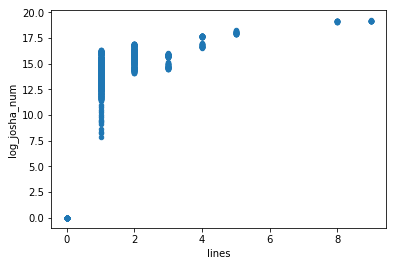

In [19]:
log_datas.plot(x='lines',y='log_josha_num', kind='scatter')

In [20]:
#相関係数
np.corrcoef(log_datas['lines'], log_datas['log_josha_num'])

array([[1.        , 0.50242396],
       [0.50242396, 1.        ]])

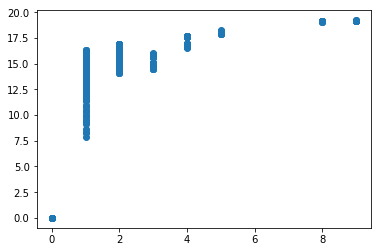

In [21]:
X2 = log_datas.lines.values

A2 = np.vstack([X2, np.ones(len(X))]).T

Y2 = log_datas.log_josha_num.values

plt.plot(X2,Y2,'o')

In [22]:
a2,b2 = np.linalg.lstsq(A2,Y2,rcond=None)[0]

print(a2,b2)

1.959201290604709 11.217401428871964


In [23]:
#決定係数を手計算する

#残差計算
child2 = ((log_datas['log_josha_num'] - (log_datas['lines']*a2 + b2))**2).sum()
child2

34393.4444787393

In [24]:
#分母の計算
mother2 = ((log_datas['log_josha_num'] - log_datas['log_josha_num'].mean())**2).sum()
mother2

46006.97829585784

In [25]:
#決定係数
#0.27なので、対数取らないで計算した方が良さそう。。。。

R = 1 - child2 / mother2
R

0.2524298323275047